In [49]:
#importing necessary libraries for data processing

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
#Reading Data files
data=pd.read_csv('C:/Users/Jathu/Desktop/Datastorm/credit_card_default_train.csv')
data_2=pd.read_csv('C:/Users/Jathu/Desktop/Datastorm/credit_card_default_test.csv')
data.isna().sum()
#There are no NaN values

Client_ID             0
Balance_Limit_V1      0
Gender                0
EDUCATION_STATUS      0
MARITAL_STATUS        0
AGE                   0
PAY_JULY              0
PAY_AUG               0
PAY_SEP               0
PAY_OCT               0
PAY_NOV               0
PAY_DEC               0
DUE_AMT_JULY          0
DUE_AMT_AUG           0
DUE_AMT_SEP           0
DUE_AMT_OCT           0
DUE_AMT_NOV           0
DUE_AMT_DEC           0
PAID_AMT_JULY         0
PAID_AMT_AUG          0
PAID_AMT_SEP          0
PAID_AMT_OCT          0
PAID_AMT_NOV          0
PAID_AMT_DEC          0
NEXT_MONTH_DEFAULT    0
dtype: int64

In [51]:
#Labels=data.pop('NEXT_MONTH_DEFAULT')


#for train data
ID=data.pop('Client_ID')   #not a feature
balance=data.pop('Balance_Limit_V1')

#for given test data
ID_2=data_2.pop('Client_ID')
balance_2=data_2.pop('Balance_Limit_V1')

In [52]:
#converting 100M,K values to integers
#for train data
for i in range (len(balance)):
    if balance[i][-1]=='M':
        balance[i]=float(balance[i][:-1])*1000000
    elif balance[i][-1]=='K':
        balance[i]=float(balance[i][:-1])*1000
    else:
         balance[i]=float(balance[i])*1
balance=pd.to_numeric(balance)
data=pd.concat([data,balance],axis=1)


#for test data
for i in range (len(balance_2)):
    if balance_2[i][-1]=='M':
        balance_2[i]=float(balance_2[i][:-1])*1000000
    elif balance_2[i][-1]=='K':
        balance_2[i]=float(balance_2[i][:-1])*1000
    else:
         balance_2[i]=float(balance_2[i])*1
balance_2=pd.to_numeric(balance_2)
data_2=pd.concat([data_2,balance_2],axis=1)
        
                    

In [53]:
#poping data with low correlation and feature importance
data.pop("EDUCATION_STATUS")
data.pop("MARITAL_STATUS")
data.pop("AGE")
data.pop("Gender")

data_2.pop("EDUCATION_STATUS")
data_2.pop("MARITAL_STATUS")
data_2.pop("AGE")
x=data_2.pop("Gender")

In [54]:
#Creating new feature due_paid__ratio_mean
#mean of paid amount/due amount ratio for six months
#this feature combines paid_amount for months features and Due_amount for months features (less features)
#paid_amount for months features and Due_amount for months features are removed from data after combining

#for train data
#pop due amount data
data_copy=data.copy()
due_july=data.pop('DUE_AMT_JULY')
due_aug=data.pop('DUE_AMT_AUG')
due_sep=data.pop('DUE_AMT_SEP')
due_oct=data.pop('DUE_AMT_OCT')
due_nov=data.pop('DUE_AMT_NOV')    
due_dec=data.pop('DUE_AMT_DEC')

#handlings 0s in due amount
for i in range (len(due_july)):
    if due_july[i]==0:
        due_july[i]=1
    if due_aug[i]==0:
        due_aug[i]=1
    if due_sep[i]==0:
        due_sep[i]=1
    if due_oct[i]==0:
        due_oct[i]=1
    if due_nov[i]==0:
        due_nov[i]=1
    if due_dec[i]==0:
        due_dec[i]=1
    if due_july[i]==0:
        due_july[i]=1
    
        
#pop paid amount data
paid_july=data.pop('PAID_AMT_JULY')
paid_aug=data.pop('PAID_AMT_AUG')
paid_sep=data.pop('PAID_AMT_SEP')
paid_oct=data.pop('PAID_AMT_OCT')
paid_nov=data.pop('PAID_AMT_NOV')
paid_dec=data.pop('PAID_AMT_DEC')


#paid amount/due amount ratio for six months
due_paid_ratio_july=paid_july/due_july
pd.to_numeric(due_paid_ratio_july)
due_paid_ratio_aug=paid_aug/due_aug
pd.to_numeric(due_paid_ratio_aug)
due_paid_ratio_sep=paid_sep/due_sep
pd.to_numeric(due_paid_ratio_sep)
due_paid_ratio_oct=paid_oct/due_oct
pd.to_numeric(due_paid_ratio_oct)
due_paid_ratio_nov=paid_nov/due_nov
pd.to_numeric(due_paid_ratio_nov)
due_paid_ratio_dec=paid_dec/due_dec
pd.to_numeric(due_paid_ratio_dec)

#mean of paid amount/due amount ratio for six months
due_paid_ratio_mean=(due_paid_ratio_july+due_paid_ratio_aug+due_paid_ratio_sep+due_paid_ratio_oct+due_paid_ratio_nov+due_paid_ratio_dec)/6
data=pd.concat([data,due_paid_ratio_mean.rename("due_paid_ratio_mean")],axis=1)    




In [55]:
#for test data
#pop due amount data
data2_copy=data_2.copy()
due_july2=data_2.pop('DUE_AMT_JULY')
due_aug2=data_2.pop('DUE_AMT_AUG')
due_sep2=data_2.pop('DUE_AMT_SEP')
due_oct2=data_2.pop('DUE_AMT_OCT')
due_nov2=data_2.pop('DUE_AMT_NOV')    
due_dec2=data_2.pop('DUE_AMT_DEC')

#handlings 0s in due amount
for i in range (len(due_july2)):
    if due_july2[i]==0:
        due_july2[i]=1
    if due_aug2[i]==0:
        due_aug2[i]=1
    if due_sep2[i]==0:
        due_sep2[i]=1
    if due_oct2[i]==0:
        due_oct2[i]=1
    if due_nov2[i]==0:
        due_nov2[i]=1
    if due_dec2[i]==0:
        due_dec2[i]=1
    if due_july2[i]==0:
        due_july2[i]=1
    
        
#pop paid amount data
paid_july2=data_2.pop('PAID_AMT_JULY')
paid_aug2=data_2.pop('PAID_AMT_AUG')
paid_sep2=data_2.pop('PAID_AMT_SEP')
paid_oct2=data_2.pop('PAID_AMT_OCT')
paid_nov2=data_2.pop('PAID_AMT_NOV')
paid_dec2=data_2.pop('PAID_AMT_DEC')


#paid amount/due amount ratio for six months
due_paid_ratio_july2=paid_july2/due_july2
pd.to_numeric(due_paid_ratio_july2)
due_paid_ratio_aug2=paid_aug2/due_aug2
pd.to_numeric(due_paid_ratio_aug2)
due_paid_ratio_sep2=paid_sep2/due_sep2
pd.to_numeric(due_paid_ratio_sep2)
due_paid_ratio_oct2=paid_oct2/due_oct2
pd.to_numeric(due_paid_ratio_oct2)
due_paid_ratio_nov2=paid_nov2/due_nov2
pd.to_numeric(due_paid_ratio_nov2)
due_paid_ratio_dec2=paid_dec2/due_dec2
pd.to_numeric(due_paid_ratio_dec2)


#mean of paid amount/due amount ratio for six months    
due_paid_ratio_mean2=(due_paid_ratio_july2+due_paid_ratio_aug2+due_paid_ratio_sep2+due_paid_ratio_oct2+due_paid_ratio_nov2+due_paid_ratio_dec2)/6
data_2=pd.concat([data_2,due_paid_ratio_mean2.rename("due_paid_ratio_mean")],axis=1)



In [56]:
#Creating new feature pay_mean
#payment history pay_mean
#mean of payments made in months whther its early payment or due

#for train data
pay_july=data_copy.pop('PAY_JULY')   # these features are good
pay_aug=data_copy.pop('PAY_AUG')
pay_sep=data_copy.pop('PAY_SEP')
pay_oct=data_copy.pop('PAY_OCT')
pay_nov=data_copy.pop('PAY_NOV')
pay_dec=data_copy.pop('PAY_DEC')

pay_mean=(pay_july+pay_aug+pay_sep+pay_oct+pay_nov+pay_dec)/6
pd.to_numeric(pay_mean)
data=pd.concat([data,pay_mean.rename("pay_mean")],axis=1)


#for Test Data
pay_july2=data2_copy.pop('PAY_JULY')   # these features are good
pay_aug2=data2_copy.pop('PAY_AUG')
pay_sep2=data2_copy.pop('PAY_SEP')
pay_oct2=data2_copy.pop('PAY_OCT')
pay_nov2=data2_copy.pop('PAY_NOV')
pay_dec2=data2_copy.pop('PAY_DEC')

pay_mean2=(pay_july2+pay_aug2+pay_sep2+pay_oct2+pay_nov2+pay_dec2)/6
pd.to_numeric(pay_mean2)
data_2=pd.concat([data_2,pay_mean2.rename("pay_mean")],axis=1)



In [57]:
#creating new feature - good_pay
#New feature to find whether the customar is a good pay,, pays on time
#good pay data

#for Train data
good_pay=pay_july.copy()

for i in range (len(pay_aug)):
    good_pay[i]=0
    if pay_july[i]<1:
        good_pay[i]+=1
    if pay_aug[i]<1:
        good_pay[i]+=1
    if pay_sep[i]<1:
        good_pay[i]+=1
    if pay_oct[i]<1:
        good_pay[i]+=1
    if pay_nov[i]<1:
        good_pay[i]+=1
    if pay_dec[i]<1:
        good_pay[i]+=1
        
data=pd.concat([data,good_pay.rename("good_pay")],axis=1)

#good pay and pay mean had better feature importance than given features

#for test data
good_pay2=pay_july2.copy()

for i in range (len(pay_aug2)):
    good_pay2[i]=0
    if pay_july2[i]<1:
        good_pay2[i]+=1
    if pay_aug2[i]<1:
        good_pay2[i]+=1
    if pay_sep2[i]<1:
        good_pay2[i]+=1
    if pay_oct2[i]<1:
        good_pay2[i]+=1
    if pay_nov2[i]<1:
        good_pay2[i]+=1
    if pay_dec2[i]<1:
        good_pay2[i]+=1
        
data_2=pd.concat([data_2,good_pay2.rename("good_pay")],axis=1)


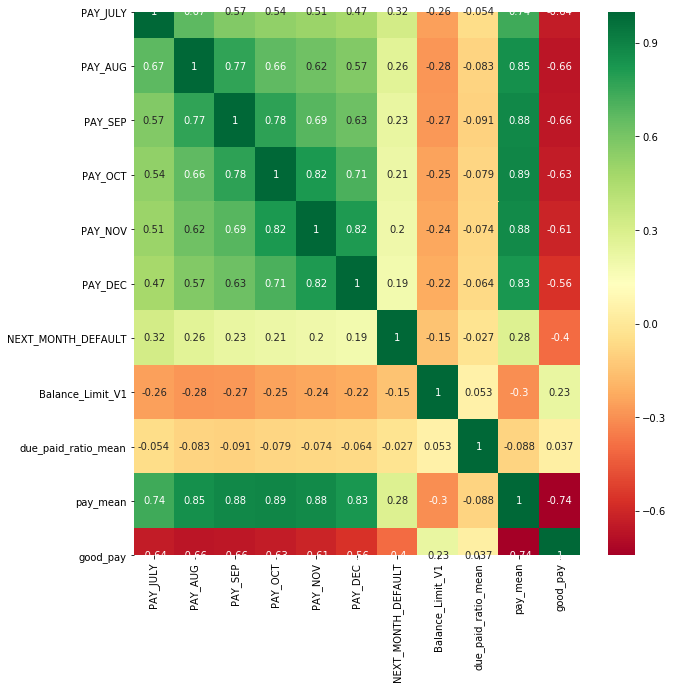

In [58]:
#Heatmap
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [59]:
#separating Labels data field
Labels=data.pop('NEXT_MONTH_DEFAULT')

In [60]:
#Machine Learning Model training part

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import roc_auc_score, classification_report
from sklearn import tree, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost

In [61]:
#Spliting the given train data set into train_data and Validation data
train_data, test_data, train_label, test_label = train_test_split(data,Labels,test_size = 0.2,random_state = 100)

Train accuracy
0.821875
Test accuracy
0.82375
F1-Score
0.4784217016029593
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      3773
           1       0.65      0.38      0.48      1027

    accuracy                           0.82      4800
   macro avg       0.75      0.66      0.69      4800
weighted avg       0.81      0.82      0.81      4800

Confusion Matrix
[[3566  207]
 [ 639  388]]
Feature Importance
[0.5781054  0.01878425 0.02555627 0.01369371 0.02757566 0.02175723
 0.03159351 0.03230343 0.07082054 0.17980996]


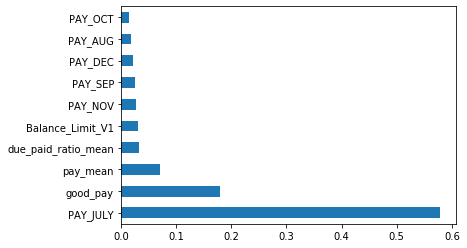

In [62]:
#XGB boost classifier approach

clf = DecisionTreeClassifier(max_depth=50)
model=xgboost.XGBClassifier(base_estimator=clf,max_depth=3,n_estimators=18,objective='binary:logistic',gamma=8.28,learning_rate=0.222,reg_lambda=0).fit(train_data,train_label)
y_predict=model.predict(test_data)
print("Train accuracy")
print(format(model.score(train_data,train_label)))
print("Test accuracy")
print(format(model.score(test_data,test_label)))
print("F1-Score")
print(f1_score(test_label,y_predict))
print("Classification Report")
print(classification_report(test_label,y_predict))
print("Confusion Matrix")
print(confusion_matrix(test_label,y_predict))

#Feature Importance in XGB boost classifier
print("Feature Importance")

#Feature Importance in XGB boost classifier

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=train_data.columns)
feat_importances.nlargest(40).plot(kind='barh')
plt.show()

#Hypertuning Parameters for Accuracy F1score and AUC score

x=np.linspace(0,1,num=201,dtype=float)
AUC=[]
F=[]
clf = DecisionTreeClassifier(max_depth=50)
for i in x:
    train_data, test_data, train_label, test_label = train_test_split(data,Labels,test_size=0.2,shuffle=True,random_state=100)
    print(i)
    model_1=xgboost.XGBClassifier(base_estimator=clf,max_depth=6,n_estimators=18,objective='binary:logistic',gamma=8.44,learning_rate=0.2,reg_lambda=1).fit(train_data,train_label)    
    #model_1= MLPClassifier(solver='sgd',learning_rate = i,learning_rate_init=0.001,activation= 'logistic', alpha=1e-6, hidden_layer_sizes=(150, ), random_state=100,max_iter=400)
    model=model_1.fit(train_data, train_label)
    y_pred= model.predict(test_data)
    f=f1_score(test_label,y_pred)
    F.append(f)
    auc=roc_auc_score(test_label,y_pred)
    AUC.append(auc)

#ploting hypertuning results

import matplotlib.pyplot as plt
plt.plot(x,AUC)
plt.title('AUC Score')
plt.ylabel('Auc')
plt.xlabel('Parameters')
plt.show()
plt.plot(x,F)
plt.title('F1 Score')
plt.ylabel('F1')
plt.xlabel('Parameters')
plt.show()
print(max(AUC))
print(max(F))
print(x[F.index(max(F))])
print(x[AUC.index(max(AUC))])

In [63]:
#Creating Submission file
submit=pd.read_csv('C:/Users/Jathu/Desktop/Datastorm/submit.csv')
submit.pop('NEXT_MONTH_DEFAULT')
predic=model.predict(data_2)
print(predic[0:100])
result=pd.DataFrame(predic,columns=['NEXT_MONTH_DEFAULT'])
submit=pd.concat([submit,result],axis=1)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
export_csv=submit.to_csv('C:/Users/Jathu/Desktop/Datastorm/submit.csv')

Train accuracy
0.8244270833333334
Test accuracy
0.8222916666666666
F1-Score
0.4493221433182699
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3773
           1       0.67      0.34      0.45      1027

    accuracy                           0.82      4800
   macro avg       0.75      0.65      0.67      4800
weighted avg       0.80      0.82      0.80      4800

Confusion Matrix
[[3599  174]
 [ 679  348]]
Feature Importance
[0.65281305 0.00842246 0.00461701 0.00610352 0.00225865 0.00740736
 0.02605775 0.05405009 0.04831503 0.18995507]


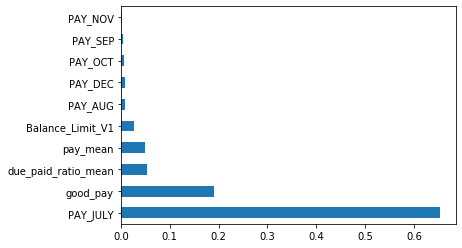

In [64]:
#Decision Tree Classifier model approach
#not a best model
clf = DecisionTreeClassifier(max_depth=6).fit(train_data,train_label)

y_predict=clf.predict(test_data)
print("Train accuracy")
print(format(clf.score(train_data,train_label)))
print("Test accuracy")
print(format(clf.score(test_data,test_label)))
print("F1-Score")
print(f1_score(test_label,y_predict))
print("Classification Report")
print(classification_report(test_label,y_predict))
print("Confusion Matrix")
print(confusion_matrix(test_label,y_predict))


#Feature Importance in Decision Tree Classifier
print("Feature Importance")
print(clf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf.feature_importances_, index=train_data.columns)
feat_importances.nlargest(40).plot(kind='barh')
plt.show()

